In [2]:
# 행정구역별 위경도 좌표 그룹화

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_path = "./data/00_스마트팜 지역별 농가현황.csv"
df = pd.read_csv(file_path, encoding='euc-kr', skipfooter=1)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_6528\2009264714.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, encoding='euc-kr', skipfooter=1)


,지역,시설원예,축산,노지작물,합계,위도,경도
0,강원도,22,4,25,51,37.860367,128.311526
1,경기도,31,104,55,190,37.436318,127.550802
2,경상남도,67,36,0,103,35.441421,128.241745
3,경상북도,62,39,11,112,36.630840,128.962578
4,광주광역시,5,0,0,5,35.160032,126.851338
5,대전광역시,1,1,0,2,36.350440,127.384951
6,부산광역시,3,0,0,3,35.179816,129.075022
7,세종특별자치시,18,2,0,20,36.480351,127.289433
8,울산광역시,0,3,0,3,35.539477,129.311299
9,전라남도,110,42,103,255,34.900727,126.957167


In [4]:
df1 = df.copy()
df1.columns

Index(['지역', '시설원예', '축산', '노지작물', '합계', '위도', '경도'], dtype='object')

In [5]:
df2 = df1[['지역', '시설원예', '위도', '경도']]
df2

,지역,시설원예,위도,경도
0,강원도,22,37.860367,128.311526
1,경기도,31,37.436318,127.550802
2,경상남도,67,35.441421,128.241745
3,경상북도,62,36.630840,128.962578
4,광주광역시,5,35.160032,126.851338
5,대전광역시,1,36.350440,127.384951
6,부산광역시,3,35.179816,129.075022
7,세종특별자치시,18,36.480351,127.289433
8,울산광역시,0,35.539477,129.311299
9,전라남도,110,34.900727,126.957167


In [22]:
df2_new = df1[["지역", "합계"]].set_index("지역")
df2_new = df2_new.sort_values("합계", ascending=False)
df2_new

,합계
지역,
전라남도,255
경기도,190
전라북도,126
경상북도,112
충청북도,107
경상남도,103
충청남도,73
강원도,51
제주특별자치도,23


In [13]:
x = df2_new.index
x
labels = [str(i) for i in x]
print(labels)

['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']


In [14]:
values = df2_new["합계"].values
values

array([ 51, 190, 103, 112,   5,   2,   3,  20,   3, 255, 126,  23,  73,
       107], dtype=int64)

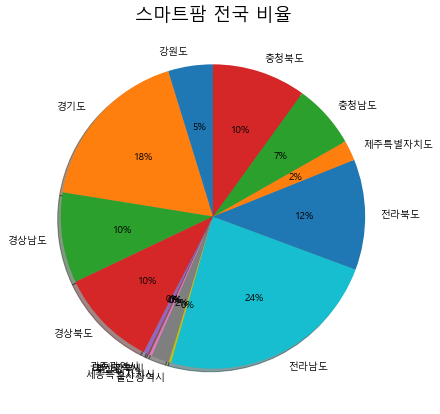

In [16]:
plt.figure(figsize=(7,7))

plt.pie(values, labels=labels, startangle=90, shadow=True, autopct="%1.f%%", counterclock=True)
plt.title("스마트팜 전국 비율", fontsize=18)
plt.show()

In [8]:
# 전국 시도 행정 경계 지도 데이터 읽어오기
file_path = "./data/foilum/SIDO_MAP_2022.json"
ggd_sg_get = json.load(open(file_path, encoding="utf-8"))
ggd_sg_get.keys()

dict_keys(['type', 'features'])

In [9]:
ggd_sg_get["features"][0]["properties"]
list(ggd_sg_get.get("features"))[0].get("properties")

{'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}

In [10]:
print(len(ggd_sg_get["features"]))

for i in range(0, len(ggd_sg_get["features"])):
    print(ggd_sg_get["features"][i]["properties"])

17
{'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}
{'CTPRVN_CD': '26', 'CTP_ENG_NM': 'Busan', 'CTP_KOR_NM': '부산광역시'}
{'CTPRVN_CD': '27', 'CTP_ENG_NM': 'Daegu', 'CTP_KOR_NM': '대구광역시'}
{'CTPRVN_CD': '28', 'CTP_ENG_NM': 'Incheon', 'CTP_KOR_NM': '인천광역시'}
{'CTPRVN_CD': '29', 'CTP_ENG_NM': 'Gwangju', 'CTP_KOR_NM': '광주광역시'}
{'CTPRVN_CD': '30', 'CTP_ENG_NM': 'Daejeon', 'CTP_KOR_NM': '대전광역시'}
{'CTPRVN_CD': '31', 'CTP_ENG_NM': 'Ulsan', 'CTP_KOR_NM': '울산광역시'}
{'CTPRVN_CD': '36', 'CTP_ENG_NM': 'Sejong-si', 'CTP_KOR_NM': '세종특별자치시'}
{'CTPRVN_CD': '41', 'CTP_ENG_NM': 'Gyeonggi-do', 'CTP_KOR_NM': '경기도'}
{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}
{'CTPRVN_CD': '43', 'CTP_ENG_NM': 'Chungcheongbuk-do', 'CTP_KOR_NM': '충청북도'}
{'CTPRVN_CD': '44', 'CTP_ENG_NM': 'Chungcheongnam-do', 'CTP_KOR_NM': '충청남도'}
{'CTPRVN_CD': '45', 'CTP_ENG_NM': 'Jeollabuk-do', 'CTP_KOR_NM': '전라북도'}
{'CTPRVN_CD': '46', 'CTP_ENG_NM': 'Jellanam-do', 'CTP_KOR_NM': '전라남도'}
{'CTPRVN_CD': '47', '

In [24]:
smartfarm = folium.Map(
    location = [36.3504396, 127.3849508],
    tiles = "OpenStreetMap",
    zoom_start = 8
)

folium.Choropleth(
    geo_data = ggd_sg_get,
    data = df2,
    columns = ["지역", "시설원예"],
    fill_color = "Greens" ,
    fill_opacity = 0.7,
    line_opacity = 0.7,
    key_on = "properties.CTP_KOR_NM"
).add_to(smartfarm)

smartfarm.save("./project2/project2app/templates/project2app/01_foliumfarm.html", index=False)
smartfarm